In [45]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import pandas as pd

%matplotlib inline
sns.set_theme(context="talk", style="darkgrid", rc={"figure.figsize": (12, 8)})
sys.path.append("reflutils")
import reflutils as ru

sharepoint = Path().home() / "Washington State University (email.wsu.edu)"/"Carbon Lab Research Group - Documents"
csv_bin = sharepoint/"Harlan Heilman"/".refl"/".csv"
data_bin = sharepoint/"Synchrotron Logistics and Data"/"ALS - Berkeley"/"Data"/"BL1101"/"2023Nov"/"XRR"/"Processed"

# November 2023

## Outline

1. Review of Beamtime Data
    - Comparing Data
    - Brewster Angle
2. MCMC Fitting
    - What Is MCMC Fitting
    - Building a Model
    - Fitting the Model

## Review of Beamtime Data

One goal of this beamtime is to determine if the samples are deteriorated. To do this, we will compare the reflectivity curves for both S and P polarized light.

In [50]:
# Load files
june_283p7_s = pd.read_csv(csv_bin / "zrt_283.7_100.csv", usecols=["Q", "Refl", "Err"])
june_283p7_p = pd.read_csv(csv_bin / "zrt_283.7_190.csv", usecols=["Q", "Refl", "Err"])

nov_283p7_s = pd.read_parquet(
    data_bin / "ZRT" / "283.7_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
nov_283p7_p = pd.read_parquet(
    data_bin / "ZRT" / "283.7_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)

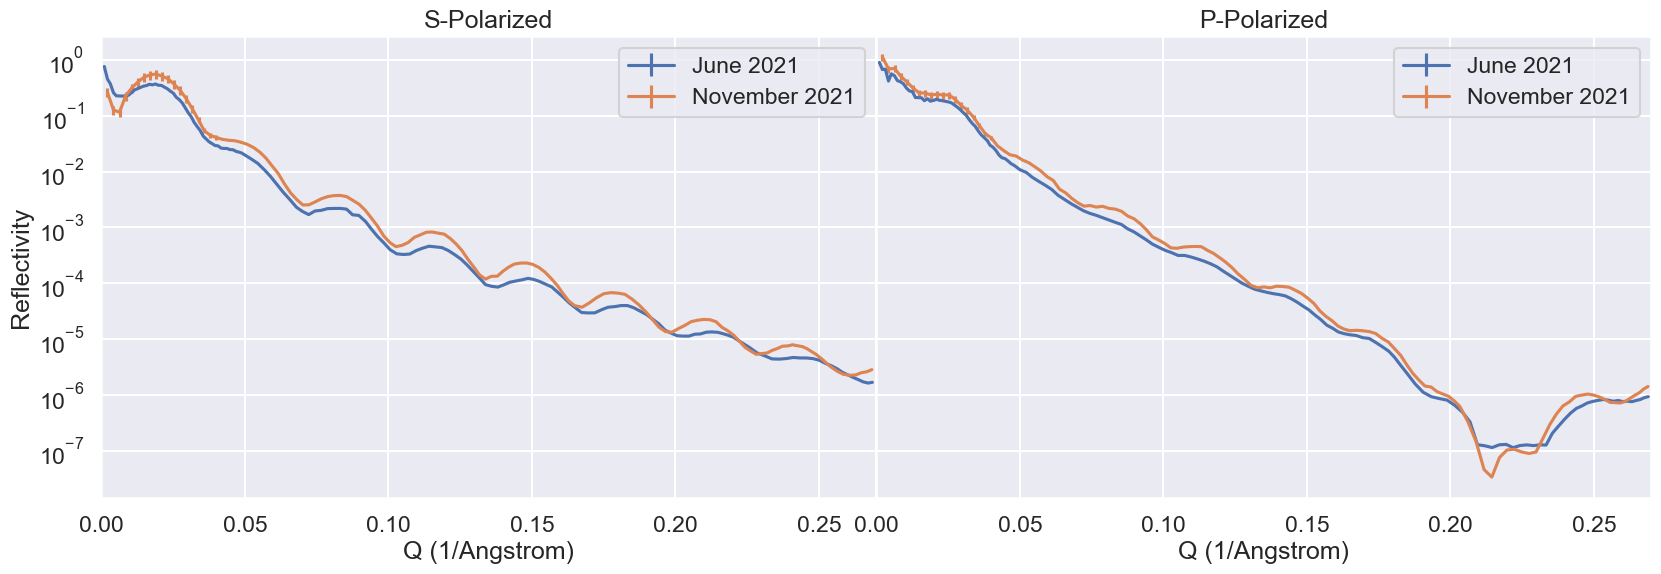

In [63]:
fig, ax = plt.subplots(
    ncols=2, figsize=(20, 6), sharey=True, sharex=True, gridspec_kw={"wspace": 0}
)

june_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="June 2021", logy=True)
nov_283p7_s.plot(
    x="Q", y="Refl", yerr="Err", ax=ax[0], label="November 2021", logy=True
)
june_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="June 2021", logy=True)
nov_283p7_p.plot(
    x="Q", y="Refl", yerr="Err", ax=ax[1], label="November 2021", logy=True
)

ax[0].set_title("S-Polarized")
ax[0].set_ylabel("Reflectivity")
ax[0].set_xlabel("Q (1/Angstrom)")
ax[0].set_xlim(0, 0.27)
ax[0].legend()

ax[1].set_title("P-Polarized")
ax[1].set_xlabel("Q (1/Angstrom)")
ax[1].legend()

## Brewster Angle
As you can see above, the brewster angle appears in reflectivity curves for P polarized light, i.e. light polarized parallel to the scattering plane. For a single infinitely thick layer, there is no reflectance at this incident angle. However, adding layers and thicknesses to the model, breaks this, allowing for reflectance arround the brewster angle. 

### Some examples in the data

<Axes: xlabel='Q'>

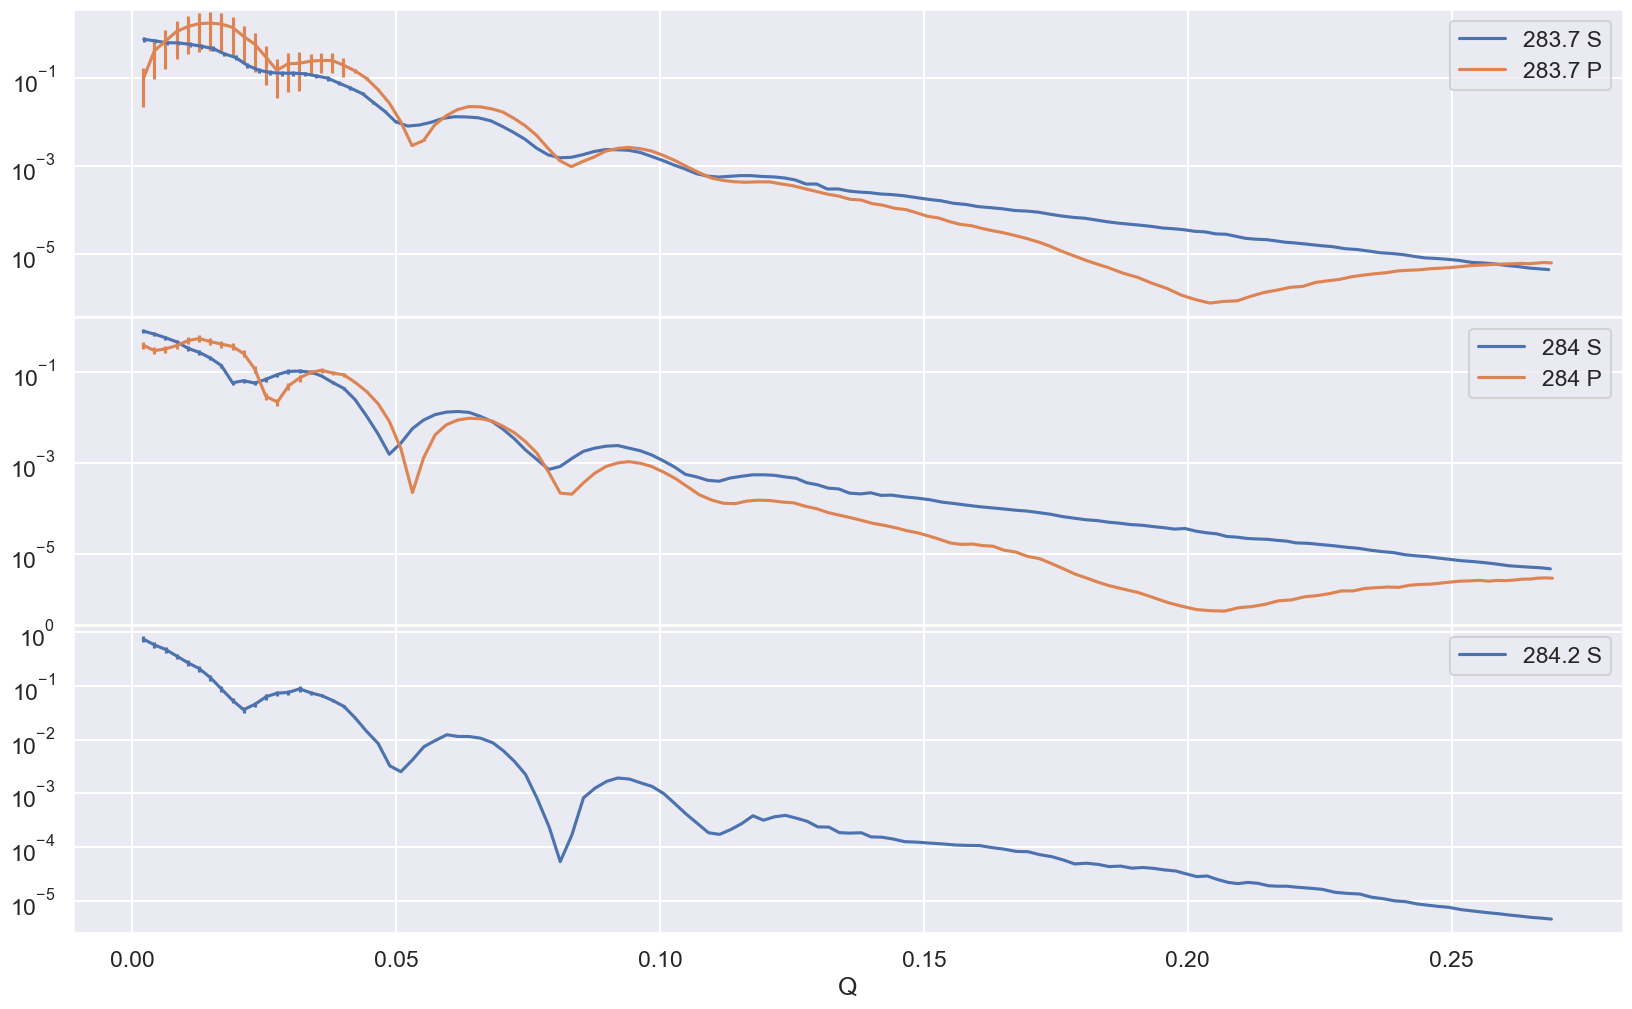

In [126]:
c60_283p7_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "283.7_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_283p7_p = pd.read_parquet(
    data_bin / "C60-ZnPc" / "283.7_190.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.0_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284_p = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.0_190.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
c60_284p2_s = pd.read_parquet(
    data_bin / "C60-ZnPc" / "284.2_100.0_refl.parquet.gzip",
    columns=["Q", "Refl", "Err"],
)
# c50_284p2_p = pd.read_parquet(data_bin/"C60-ZnPc" / "284.2_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"])

fig, ax = plt.subplots(
    nrows=3, figsize=(20, 12), sharex=True, gridspec_kw={"wspace": 0, "hspace": 0}
)
c60_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 S", logy=True)
c60_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 P", logy=True)
c60_284_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 S", logy=True)
c60_284_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 P", logy=True)
c60_284p2_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 S", logy=True)
# c50_284p2_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 P", logy=True)

Note that I need to transfer the 284.2 p pol data

<Axes: xlabel='Q'>

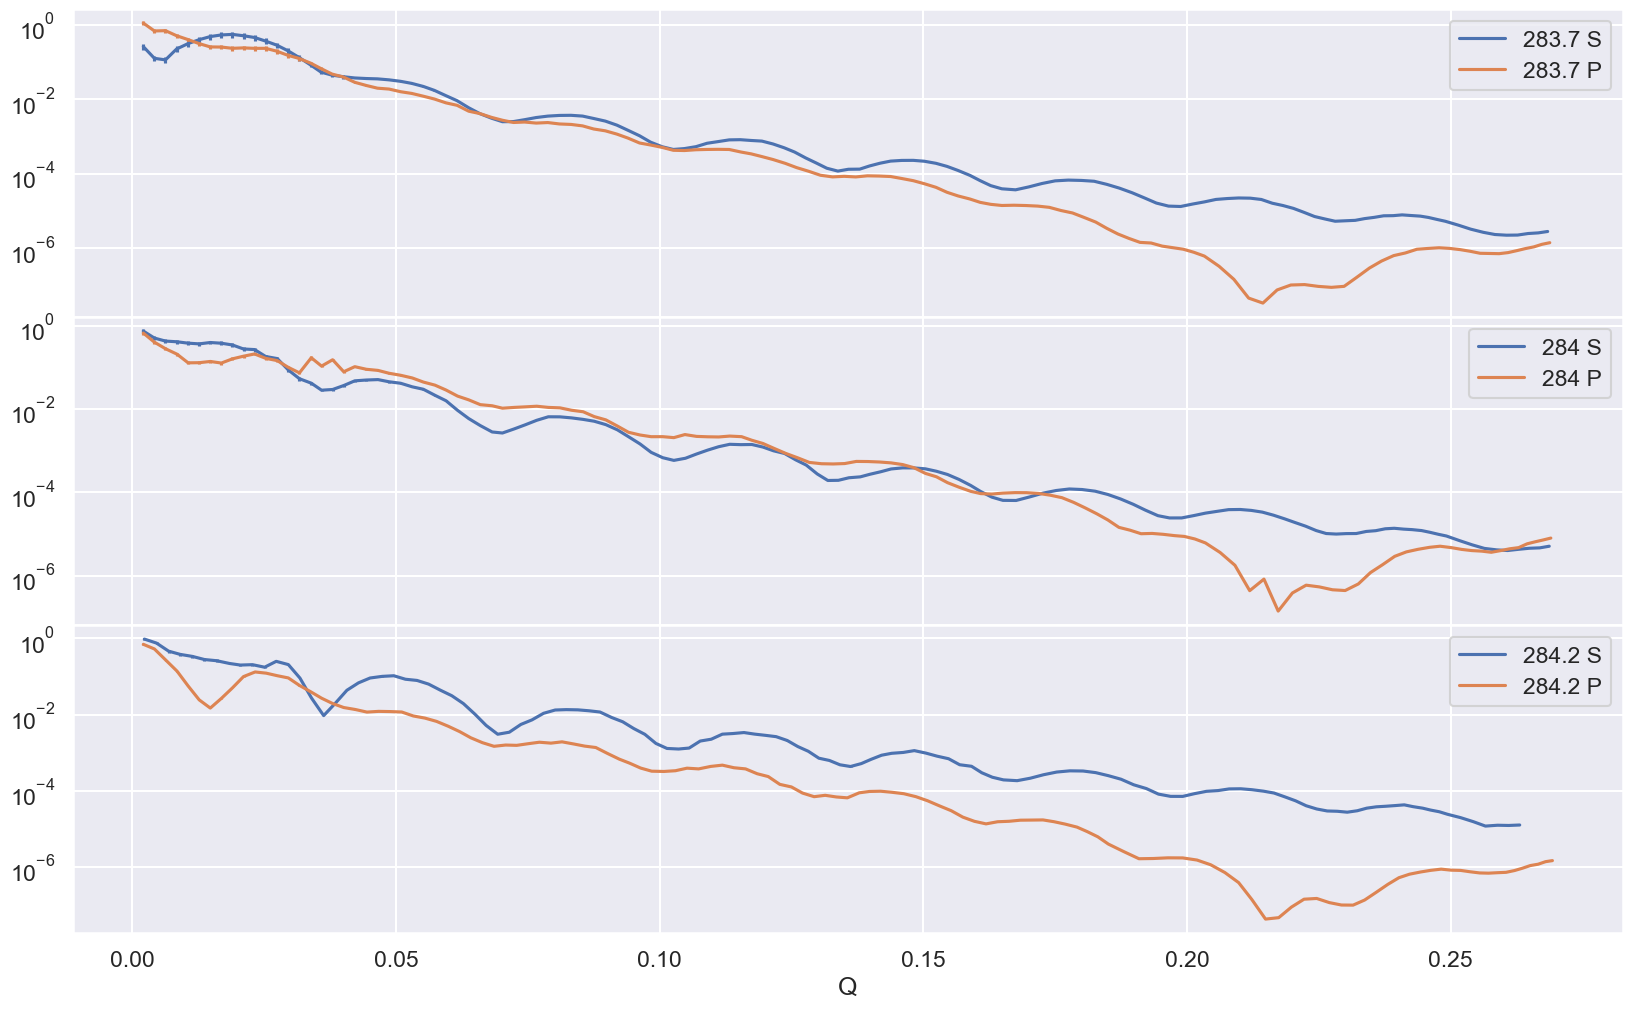

In [127]:
znpc_283p7_s = pd.read_parquet(
    data_bin / "ZRT" / "283.7_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_283p7_p = pd.read_parquet(
    data_bin / "ZRT" / "283.7_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p0_s = pd.read_parquet(
    data_bin / "ZRT" / "284.0_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p0_p = pd.read_parquet(
    data_bin / "ZRT" / "284.0_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p2_s = pd.read_parquet(
    data_bin / "ZRT" / "284.2_100.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)
znpc_284p2_s = znpc_284p2_s.iloc[:123]
znpc_284p2_p = pd.read_parquet(
    data_bin / "ZRT(2)" / "284.2_190.0_refl.parquet.gzip", columns=["Q", "Refl", "Err"]
)

fig, ax = plt.subplots(
    nrows=3, figsize=(20, 12), sharex=True, gridspec_kw={"wspace": 0, "hspace": 0}
)
znpc_283p7_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 S", logy=True)
znpc_283p7_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[0], label="283.7 P", logy=True)
znpc_284p0_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 S", logy=True)
znpc_284p0_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[1], label="284 P", logy=True)
znpc_284p2_s.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 S", logy=True)
znpc_284p2_p.plot(x="Q", y="Refl", yerr="Err", ax=ax[2], label="284.2 P", logy=True)

Note that this scan is not the best, I need to reprocess the data since this one got messed up. 

## MCMC Fitting

T